# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
from dotenv import load_dotenv
from path import Path
import pandas as pd

import nltk as nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LEON\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
In C:\Users\LEON\anaconda3\envs\quantenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\LEON\anaconda3\envs\quantenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\LEON\anaconda3\envs\quantenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
# Load env variables and read the News API Key enviroment variable
load_dotenv(dotenv_path = Path("C:/Users/Leon/API_keys/.env"))
api_key = os.getenv("NEWS_API_KEY")
type(api_key)

str

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
Bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",            
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {Bitcoin_headlines['totalResults']}")

# Show sample article
Bitcoin_headlines["articles"][0]


Total articles about Bitcoin: 7191


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Elizabeth Lopatto',
 'title': 'Jack Dorsey defends Twitter’s Trump ban, then enthuses about bitcoin',
 'description': 'Twitter CEO Jack Dorsey, in a series of Tweets, explained that he felt banning US President Donald Trump’s account was the right move for the social network. “Offline harm as a result of online speech is demonstrably real, and what drives our policy and enfor…',
 'url': 'https://www.theverge.com/2021/1/13/22230028/jack-dorsey-donald-trump-twitter-ban-moderation-bitcoin-thread',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/2pWrvN_qQZ7qWG0HEMBnYO0n8ks=/0x10:3323x1750/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22234226/1229659186.jpg',
 'publishedAt': '2021-01-14T00:57:27Z',
 'content': 'Ban reflects Twitters failure to promote healthy conversation\r\nPhoto by Hannah McKay-Pool/Getty Images\r\nTwitter CEO Jack Dorsey, in a series of Tweets, explained that he felt banning US President Don… [

In [5]:
# Fetch the Ethereum news articles
Ethereum_headlines = newsapi.get_everything(
    q="Ethereum",            
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {Ethereum_headlines['totalResults']}")

# Show sample article
Ethereum_headlines["articles"][0]

Total articles about Ethereum: 1583


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Lucas Matney',
 'title': 'Coinbase is going public via direct listing',
 'description': 'Coinbase plans to go public by way of a direct listing, the company announced in a blog post today. The cryptocurrency exchange was founded in 2012 and allows users to buy and trade decentralized tokens like bitcoin and ethereum. The company has raised over $…',
 'url': 'http://techcrunch.com/2021/01/28/coinbase-is-going-public-via-direct-listing/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/01/coinbase.jpg?w=750',
 'publishedAt': '2021-01-28T19:36:35Z',
 'content': 'Coinbase plans to go public by way of a direct listing, the company announced in a blog post today.\r\nThe cryptocurrency exchange was founded in 2012 and allows users to buy and trade decentralized to… [+1258 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            "text": text,
            "date": date,
            
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-01-14,Ban reflects Twitters failure to promote healt...,-0.3818,0.135,0.176,0.689
1,2021-01-18,"When Mt. Gox went bankrupt in 2014, it was the...",-0.5574,0.000,0.096,0.904
2,2021-01-14,Cryptocurrency exchange company Gemini is acqu...,0.6249,0.150,0.000,0.850
3,2021-01-28,TL;DR: The Bitcoin and Cryptocurrency Mastery ...,0.0000,0.000,0.000,1.000
4,2021-01-29,"As the man himself said, it was inevitable. \r...",-0.5037,0.000,0.114,0.886


In [7]:
# Bitcoin_df.text.duplicated

In [8]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            "text": text,
            "date": date,
            
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-01-28,Coinbase plans to go public by way of a direct...,0.0000,0.000,0.0,1.000
1,2021-02-04,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2021-02-03,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.0,1.000
3,2021-02-04,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
4,2021-01-05,Cryptocurrencies stole headlines on the first ...,0.3412,0.074,0.0,0.926


In [9]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()

,compound,positive,negative,neutral
count,94.000000,94.000000,94.000000,94.000000
mean,0.025647,0.037043,0.027255,0.935713
std,0.334549,0.062020,0.053379,0.086485
min,-0.844200,0.000000,0.000000,0.647000
25%,0.000000,0.000000,0.000000,0.899250
50%,0.000000,0.000000,0.000000,1.000000
75%,0.115300,0.066750,0.028500,1.000000
max,0.921700,0.353000,0.228000,1.000000


In [10]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,compound,positive,negative,neutral
count,94.000000,94.000000,94.000000,94.000000
mean,0.123374,0.057011,0.023968,0.919032
std,0.348758,0.074360,0.049680,0.091538
min,-0.812600,0.000000,0.000000,0.687000
25%,0.000000,0.000000,0.000000,0.875000
50%,0.000000,0.017500,0.000000,0.935500
75%,0.356200,0.100000,0.027750,1.000000
max,0.900100,0.313000,0.208000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum (0.057) has the highest mean positive score vs. Bitcoin (0.027)

Q: Which coin had the highest compound score?

A: Bitcoin (0.9217) had the highest coumpound score vs. Ethereum (0.9001)

Q. Which coin had the highest positive score?

A: Bitcoin (0.353) had the highest positive sore vs. Ethereum (0.313)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove characters that are not lettersthe including punctuation from text
    regex = re.compile("[^a-zA-Z ]")           
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)  
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]   
   
    # Create a list of stopwords
    sw = set(stopwords.words('english')) 	
    # Expand the default stopwords list if necessary
    sw_addons = {}
    
    # Covert to lower case & Remove the stop words
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
        
    return output

In [14]:
# Create a new tokens column for Bitcoin
Bitcoin_df["Bitcoin_tokenized"]=  Bitcoin_df["text"].apply(tokenizer)  
Bitcoin_df.head()

,date,text,compound,positive,negative,neutral,Bitcoin_tokenized
0,2021-01-14,Ban reflects Twitters failure to promote healt...,-0.3818,0.135,0.176,0.689,"[ban, reflects, twitters, failure, promote, he..."
1,2021-01-18,"When Mt. Gox went bankrupt in 2014, it was the...",-0.5574,0.000,0.096,0.904,"[mt, gox, went, bankrupt, wa, world, largest, ..."
2,2021-01-14,Cryptocurrency exchange company Gemini is acqu...,0.6249,0.150,0.000,0.850,"[cryptocurrency, exchange, company, gemini, ac..."
3,2021-01-28,TL;DR: The Bitcoin and Cryptocurrency Mastery ...,0.0000,0.000,0.000,1.000,"[tldr, bitcoin, cryptocurrency, mastery, bundl..."
4,2021-01-29,"As the man himself said, it was inevitable. \r...",-0.5037,0.000,0.114,0.886,"[man, said, wa, inevitableon, friday, tesla, c..."


In [15]:
# Create a new tokens column for Ethereum
Ethereum_df["Ethereum_tokenized"]=  Ethereum_df["text"].apply(tokenizer)  
Ethereum_df.head()

,date,text,compound,positive,negative,neutral,Ethereum_tokenized
0,2021-01-28,Coinbase plans to go public by way of a direct...,0.0000,0.000,0.0,1.000,"[coinbase, plan, go, public, way, direct, list..."
1,2021-02-04,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
2,2021-02-03,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.0,1.000,"[reuters, stafffile, photo, representation, et..."
3,2021-02-04,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
4,2021-01-05,Cryptocurrencies stole headlines on the first ...,0.3412,0.074,0.0,0.926,"[cryptocurrencies, stole, headline, first, sto..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
tokens_Bitcoin=[]

for i in Bitcoin_df["Bitcoin_tokenized"]:
    tokens_Bitcoin.extend(i)
    
bigrams_Bitcoin = ngrams(tokens_Bitcoin, 2)    

# # Inspect the result:
# for i in bigrams_Bitcoin:
#     print (i)

In [18]:
# Generate the Ethereum N-grams where N=2
tokens_Ethereum=[]

for i in Ethereum_df["Ethereum_tokenized"]:
    tokens_Ethereum.extend(i)
    
bigrams_Ethereum = ngrams(tokens_Ethereum, 2)    

# Inspect the result:
# for i in bigrams_Ethereum:
#     print (i)

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""    
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
token_count(tokens_Bitcoin, 10)

[('char', 90),
 ('bitcoin', 77),
 ('reuters', 71),
 ('currency', 34),
 ('taken', 32),
 ('photo', 30),
 ('virtual', 27),
 ('illustration', 25),
 ('seen', 24),
 ('reutersdado', 24)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
token_count(tokens_Ethereum, 10)

[('char', 92),
 ('bitcoin', 43),
 ('ethereum', 28),
 ('reuters', 25),
 ('cryptocurrency', 24),
 ('photo', 20),
 ('currency', 20),
 ('virtual', 19),
 ('ha', 19),
 ('taken', 18)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

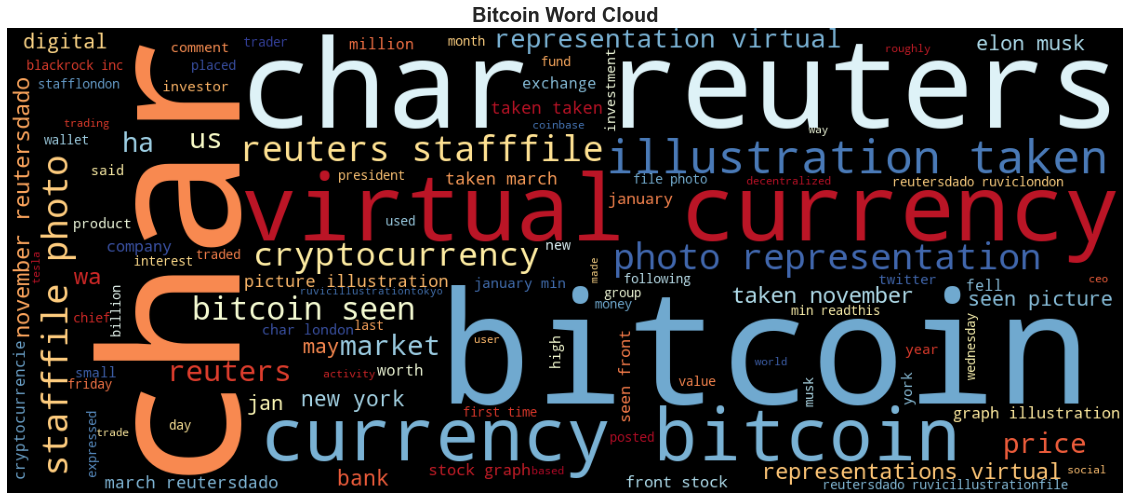

In [23]:
# Generate the Bitcoin word cloud
wc_Bitcoin = WordCloud(width=1200, height=500, max_words=100, colormap="RdYlBu").generate(' '.join(tokens_Bitcoin))
plt.imshow(wc_Bitcoin)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

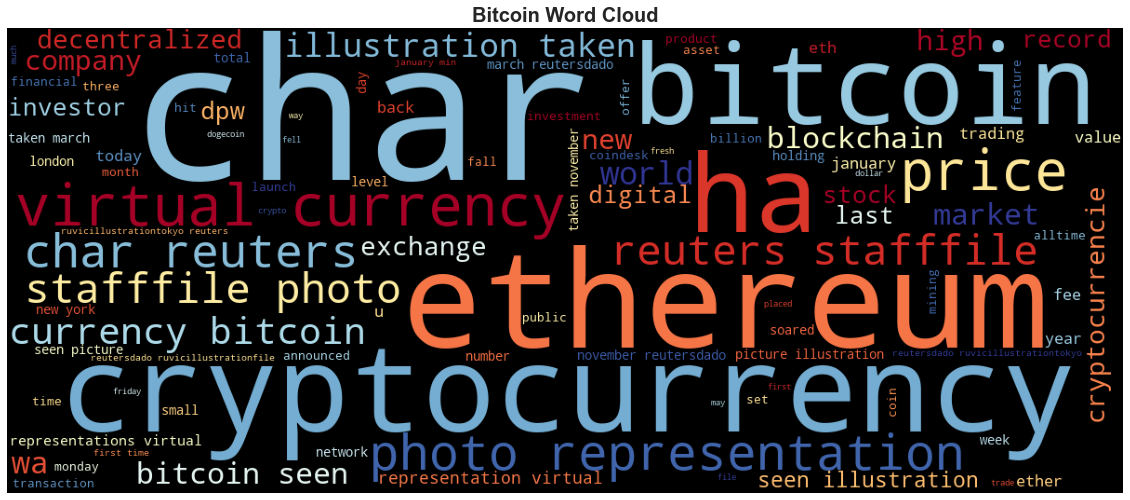

In [24]:
# Generate the Ethereum word cloud
wc_Ethereum = WordCloud(width=1200, height=500, max_words=100, colormap="RdYlBu").generate(' '.join(tokens_Ethereum))
plt.imshow(wc_Ethereum)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
concat_texs_Bitcoin = []

for i in Bitcoin_df["text"]:
    concat_texs_Bitcoin.append(i)

# # Inspect:    
# print(concat_texs_Bitcoin)

In [29]:
# Run the NER processor on all of the text
# Add a title to the document
doc_Bitcoin = nlp(str(concat_texs_Bitcoin))

In [30]:
# Render the visualization
displacy.render(doc_Bitcoin[:500], style='ent')

In [31]:
# List SAMPLE Entities
doc_Bitcoin.ents[:10]

(Twitters,
 Hannah McKay-Pool/Getty,
 Jack Dorsey,
 Tweets,
 US,
 Don,
 Mt. Gox,
 2014,
 Bitcoin,
 850,000)

In [32]:
# List all Entities
# doc_Bitcoin.ents

---

### Ethereum NER

In [39]:
# Concatenate all of the Ethereum text together
concat_texs_Ethereum = []

for i in Ethereum_df["text"]:
    concat_texs_Ethereum.append(i)

# # Inspect:    
# print(concat_texs_Ethereum)

In [34]:
# Run the NER processor on all of the text
doc_Ethereum = nlp(str(concat_texs_Ethereum))

# Add a title to the document
doc_Ethereum.user_data["title"] = "Bitcoin NER"

In [35]:
# Render the visualization
displacy.render(doc_Ethereum[:500], style='ent')

In [36]:
# List SAMPLE Entities
doc_Ethereum.ents[:10]

(2012,
 February 3, 2018,
 REUTERS/,
 Dado Ruvic/Illustration\r\nTOKYO,
 Reuters,
 February 3, 2018,
 REUTERS/,
 February 3, 2018,
 REUTERS/Dado Ruvic/Illustration/File Photo\r\nLONDON,
 first)

In [37]:
# List all Entities
# doc_Ethereum.ents

---